# Feature Extraction of Text Classification

In this notebook we will learn how to do feature extraction for solving text classification problems.

More specifically, we will go through various steps of feature extraction. The knowledge gained from this notebook will be used to implement Machine Learning algorithms for text classification, such as Naive Bayes classifier.


## What is feature extraction?

Text Analysis and classification is a major application field for Machine Learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

Thus it is important to know how to extract feature vectors suitable for text classification.

Feature extraction consists in transforming arbitrary data, such as text or images, into numerical features usable for machine learning.


## What is a feature?

Each individual token occurrence frequency (normalized or not) is treated as a feature.

The vector of all the token frequencies for a given document is considered a multivariate sample.

A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

We call <strong><font color=red size=4>vectorization</font></strong> the general process of turning a collection of text documents into numerical feature vectors. This vectorization strategy is called the <font color=blue>Bag of Words or “Bag of n-grams”</font> representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.


## Steps in Feature Extraction

Generally there are three steps in feature extraction.
1. Text Normalization (Stemming & Lemmatization)
2. Text Preprocessing (Tokenization, removing stop words, etc.)
3. Vectorization of the features



## Python Libraries for Feature Extraction

We will use python libraries such as Natural Language Tool Kit (NLTK) and Scikit-Learn to extract numerical features from text content.



# <font color=blue> 1. Text Normalization by Stemming & Lemmatization </font>

Before we do text preprocessing (e.g., tokenize, remove stop words, etc.) and convert to vectors of numbers, sometimes it is useful to normalize the text.

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing.

These techniques are used to prepare text, words, and documents for further processing. Stemming and Lemmatization have been studied, and algorithms have been developed in Computer Science since the 1960's.


## What is Text Normalization?

Languages we speak and write are made up of several words often derived from one another. When a language contains words that are derived from another word as their use in the speech changes is called Inflected Language.

Below are some examples:

- Playing, Plays, Played -> Play (common root)
- am, are, is --> be (common root)
- Car, cars, car's, cars' --> car


Following example shows how the text normalization works using stemming and lemmatization:

- The boy's cars are different colors --> the boy car be differ color


#### But stemming and Lemmatization do normalization in different ways!



### Stemming

Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is <strong><font color=red>not a valid word</font></strong> in the Language. 

For example, books —> book, looked —> look. 

There are two stemming algorithms:
- Porter stemming algorithm (removes common morphological and inflexional endings from words
- Lancaster stemming algorithm (a more aggressive stemming algorithm) 

PorterStemmer is the oldest one originally developed in 1979. LancasterStemmer was developed in 1990 and uses a more aggressive approach than Porter Stemming Algorithm.

### Lemmatization
 
Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the <strong><font color=red>root word belongs to the language</font></strong>. As opposed to stemming, lemmatization does not simply chop off inflections. Instead it uses lexical knowledge bases to get the correct base forms of words.

In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.


## Stemming & Lemmatization using Python

Python provides the Natural Language Tool Kit (NLTK) library to make programs that work with natural language. It has a user-friendly interface to datasets that are over 50 corpora and lexical resources such as <strong><font color=blue size=4>WordNet</font></strong> Word repository. The library can perform different operations such as tokenizing, stemming, classification, parsing, tagging, and semantic reasoning.


### Installing NLTK:
To install nltk use the pip installer:
- pip install nltk


## Stemming vs. Lemmatization

Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.

Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming. You also had to define a parts-of-speech to obtain the correct lemma.

So when to use what? 

The above points show that if speed is focused then stemming should be used since lemmatizers scan a corpus which consumed time and processing. It depends on the application you are working on that decides if stemmers should be used or lemmatizers. If you are building a language application in which language is important you should use lemmatization as it uses a corpus to match root forms.



For more detail see the following URL:
https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

In [2]:
# Download Wordnet through NLTK
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer

[nltk_data] Downloading package wordnet to /Users/hasan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Lemmatizing Using the WordNetLemmatizer

In [7]:
# Create the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize Single Words

print("Some lemmatized words:")
print("bats -> %s" % lemmatizer.lemmatize("bats"))

print("are -> %s" % lemmatizer.lemmatize("are"))

print("feet -> %s" % lemmatizer.lemmatize("feet"))

print("plays -> %s" % lemmatizer.lemmatize("plays"))


# Define a sentence to be lemmatized
sentence = "The students received grades from the Professor's webpage."
print("\nExample Sentence: ", sentence)

# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(sentence)
print("\nTokenized Words:")
print(word_list)


# Lemmatize list of words and join
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print("\nLemmatized Output:")
print(lemmatized_output)

Some lemmatized words:
bats -> bat
are -> are
feet -> foot
plays -> play

Example Sentence:  The students received grades from the Professor's webpage.

Tokenized Words:
['The', 'students', 'received', 'grades', 'from', 'the', 'Professor', "'s", 'webpage', '.']

Lemmatized Output:
The student received grade from the Professor 's webpage .


## Stemming Using the PorterStemmer

In [8]:
# Create the Porter stemmer
stemmer = PorterStemmer()


print("Some stemmed words:")
print("bats -> %s" % stemmer.stem("bats"))

print("are -> %s" % stemmer.stem("are"))

print("feet -> %s" % stemmer.stem("feet"))

print("plays -> %s" % stemmer.stem("plays"))

word_list = nltk.word_tokenize(sentence)
print("\nTokenized Words:")
print(word_list)

    
stemmed_output = ' '.join([stemmer.stem(w) for w in word_list])
print("\nStemmed Output (Porter):")
print(stemmed_output)

Some stemmed words:
bats -> bat
are -> are
feet -> feet
plays -> play

Tokenized Words:
['The', 'students', 'received', 'grades', 'from', 'the', 'Professor', "'s", 'webpage', '.']

Stemmed Output (Porter):
the student receiv grade from the professor 's webpag .


## Stemming Using the LancasterStemmer

In [9]:
# Create the Lancaster stemmer
stemmer = LancasterStemmer()

print("Some stemmed words:")
print("bats -> %s" % stemmer.stem("bats"))

print("are -> %s" % stemmer.stem("are"))

print("feet -> %s" % stemmer.stem("feet"))

print("plays -> %s" % stemmer.stem("plays"))

stemmed_output = ' '.join([stemmer.stem(w) for w in word_list])
print("\nStemmed Output (Lancaster):")
print(stemmed_output)

Some stemmed words:
bats -> bat
are -> ar
feet -> feet
plays -> play

Stemmed Output (Lancaster):
the stud receiv grad from the profess 's webp .


## <font color=maroon> Observation about Stemming & Lemmatization </font>

We draw two useful observations about stemming and lemmatization in the context of text classification.

- Lemmatization is a more suitable technique for word normalization in text classification. Because, unlike stemming, it reduces inflected words to the lemma (canonical) words that exists in the language.
- If steeming should be used, then Porter stemmer is preferable. Lancaster stemmer is more aggressive.

# <font color=blue> 2. Text Preprocessing (tokenization, removing stop words, etc.) & 3. Vectorization of the features</font>




In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.


## Bags of words

The most intuitive way to do so is to use a bags of words representation:

Assign a fixed integer id to each word occurring in any document of the training set (for instance by building a dictionary from words to integer indices).
For each document #i, count the number of occurrences of each word w and store it in X[i, j] as the value of feature #j where j is the index of word w in the dictionary.

The bags of words representation implies that n_features is the number of distinct words in the corpus: this number is typically larger than 100,000.

## Text Preprocessing & Feature Vectorization

The Scikit-Learn CountVectorizer() object implements both text preprocessing and feature vectorization in a single class.

It converts a collection of text documents to a matrix of token counts. It produces a sparse representation of the counts using scipy.sparse.csr_matrix.

For example, it creates the a set of $d$ unique words (referred as tokens) from the collection of documents. Then, each document is represented by a $d-dimensional$ feature vector. Each component of this vector represents the occurance count of the feature (term) in that document. 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

documents = (
"This book is good.",
"Good books are good to read."
)


count_vect = CountVectorizer(lowercase=True)


# Create a matrix representation of the documents
# Each row represents a single document
# Each column represents the term frequecy for each feature
document_counts = count_vect.fit_transform(documents).todense()


print("Feature Names:")
print(count_vect.get_feature_names())


print("\nVocabulary: ", count_vect.vocabulary_)
print("Note: After each word the index of that word is given. It's not word count.")

print("\nGet the index of the words from the vocabulary:")
print("Vocabulary - Index of good: ", count_vect.vocabulary_.get("good"))
print("Vocabulary - Index of awesome: ", count_vect.vocabulary_.get("awesome"))



print("\nCount Vector Matrix (Dense Matrix)")
#print(document_counts.toarray())
print(document_counts)

Feature Names:
['are', 'book', 'books', 'good', 'is', 'read', 'this', 'to']

Vocabulary:  {'to': 7, 'read': 5, 'are': 0, 'book': 1, 'books': 2, 'good': 3, 'is': 4, 'this': 6}
Note: After each word the index of that word is given. It's not word count.

Get the index of the words from the vocabulary:
Vocabulary - Index of good:  3
Vocabulary - Index of awesome:  None

Count Vector Matrix (Dense Matrix)
[[0 1 0 1 1 0 1 0]
 [1 0 1 2 0 1 0 1]]


## Test Preprocessing: Removing Stop Words

Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text.

The stop words may be removed to avoid them being construed as signal for prediction. Sometimes, however, similar words are useful for prediction, such as in classifying writing style or personality.

To remove the stop words, set the "stop_words" attribute value of the CountVectorizer to 'english'.

Note that if the value is set to ‘english’, a built-in stop word list for English is used. 

However, there are several known issues with ‘english’:

URL: http://aclweb.org/anthology/W18-2502


In [19]:
count_vect = CountVectorizer(lowercase=True, stop_words='english')
document_counts = count_vect.fit_transform(documents)


print("Feature Names:")
print(count_vect.get_feature_names())


print("\nVocabulary: ", count_vect.vocabulary_)


print("\nCount Vector Matrix (Dense Matrix)")
print(document_counts.toarray())

Feature Names:
['book', 'books', 'good', 'read']

Vocabulary:  {'good': 2, 'read': 3, 'book': 0, 'books': 1}

Count Vector Matrix (Dense Matrix)
[[1 0 1 0]
 [0 1 2 1]]


# Feature Vectorization: TF-IDF Term Weighting

In a large text corpus, some words will be very present (e.g., “the”, “a”, “is” in English), hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.

There are two ways to implement the tf-idf transform:

- First compute the occurance counting and then apply tf-idf transformer (CountVectorizer and TfidfTransformer)
- Use TfidfVectorizer that combines CountVectorizer and TfidfTransformer in a single model


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)


print("Feature Names:")
print(tfidf_vectorizer.get_feature_names())


print("\nVocabulary:")
print(tfidf_vectorizer.vocabulary_)


print("\nTF-IDF Matrix:")
print(tfidf_matrix.toarray())


Feature Names:
['are', 'book', 'books', 'good', 'is', 'read', 'this', 'to']

Vocabulary:
{'are': 0, 'this': 6, 'read': 5, 'book': 1, 'is': 4, 'to': 7, 'books': 2, 'good': 3}

TF-IDF Matrix:
[[0.         0.53404633 0.         0.37997836 0.53404633 0.
  0.53404633 0.        ]
 [0.40740124 0.         0.40740124 0.57973867 0.         0.40740124
  0.         0.40740124]]


# Feature Vectorization: Counting Binary Occurances

In some scenarios we are interested about the binary occurrence markers for the features. 

For example, very short texts are likely to have noisy tf–idf values while the binary occurrence info is more stable.

Also, some estimators such as <strong><font color=red size=4>Multivariate Bernoulli</font></strong> Naive Bayes explicitly models discrete boolean random variables. 

We can count the binary occurances of the features by using the "binary" attribute of CountVectorizer. 

In [21]:
# binary : boolean, default=False
# If True, all non zero counts are set to 1. 
# This is useful for discrete probabilistic models that model binary events rather than integer counts.

count_vect = CountVectorizer(lowercase=True, binary=True)
document_counts = count_vect.fit_transform(documents)


print("Feature Names:")
print(count_vect.get_feature_names())


print("\nVocabulary: ", count_vect.vocabulary_)


print("\nCount Vector Matrix")
print(document_counts.toarray())


Feature Names:
['are', 'book', 'books', 'good', 'is', 'read', 'this', 'to']

Vocabulary:  {'are': 0, 'this': 6, 'read': 5, 'book': 1, 'is': 4, 'to': 7, 'books': 2, 'good': 3}

Count Vector Matrix
[[0 1 0 1 1 0 1 0]
 [1 0 1 1 0 1 0 1]]


# Limitations of the Bag of Words representation


The bag of words model is a collection of unigrams. There are some limitations of this model:
- It cannot capture phrases and multi-word expressions.
- It effectively disregards any word order dependence. 
- It doesn’t account for potential misspellings or word derivations.

A better and sophisticated model for feature representation is the n-grams model. Instead of building a simple collection of unigrams (n=1), one might prefer a collection of bigrams (n=2), where occurrences of pairs of consecutive words are counted.

The n-grams model provides a set of co-occuring words within a given window. When computing the n-grams we typically move $n$ word forward. For example, consider the sentence "The woods are lovely, dark and deep". If n = 2 (bigrams), then the ngrams would be:

- the woods
- woods are
- are lovely
- lovely dark
- dark and
- and deep


We might alternatively consider a collection of character n-grams, a representation resilient against misspellings and derivations.

## How to Use the n-grams Model:
To use the n-grams model we need to set the following two attributes of the CountVectorizer.

- ngram_range : tuple (min_n, max_n)
The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

- analyzer : string, {‘word’, ‘char’, ‘char_wb’} or callable
Whether the feature should be made of word or character n-grams. Option ‘char_wb’ creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.

In [22]:
# To create bigrams, set the "ngram_range" to the tuple (1, 2)
count_vect = CountVectorizer(lowercase=True, analyzer="word", ngram_range=(1, 2))
document_counts = count_vect.fit_transform(documents)


print("Feature Names:")
print(count_vect.get_feature_names())


print("\nVocabulary: ", count_vect.vocabulary_)


print("\nCount Vector Matrix")
print(document_counts.toarray())

Feature Names:
['are', 'are good', 'book', 'book is', 'books', 'books are', 'good', 'good books', 'good to', 'is', 'is good', 'read', 'this', 'this book', 'to', 'to read']

Vocabulary:  {'book is': 3, 'is good': 10, 'good to': 8, 'are good': 1, 'to': 14, 'good books': 7, 'this book': 13, 'read': 11, 'books': 4, 'to read': 15, 'are': 0, 'book': 2, 'this': 12, 'books are': 5, 'is': 9, 'good': 6}

Count Vector Matrix
[[0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0]
 [1 1 0 0 1 1 2 1 1 0 0 1 0 0 1 1]]


# Word Cloud: Visual Interpretation of the Textual Contents

One way to analyze text is to use word clouds. Word clouds can help us see what seems to matter to us the most relative to other things.

A Word Cloud or Tag Cloud is a visual representation of text data in the form of tags, which are typically single words whose importance is visualized by way of their size and color. As unstructured data in the form of text continues to see unprecedented growth, especially within the field of social media, there is an ever-increasing need to analyze the massive amounts of text generated from these systems. A Word Cloud is an excellent option to help visually interpret text and is useful in quickly gaining insight into the most prominent items in a given text, by visualizing the word frequency in the text as a weighted list.

We can generate a word cloud by using python's WordCloud library.

## Install WordCloud

To install WordCloud, use the following 3 commands on Terminal/Prompt:
- git clone https://github.com/amueller/word_cloud.git
- cd word_cloud
- pip install .

Then, you need import WordCloud as follows.

- from wordcloud import WordCloud

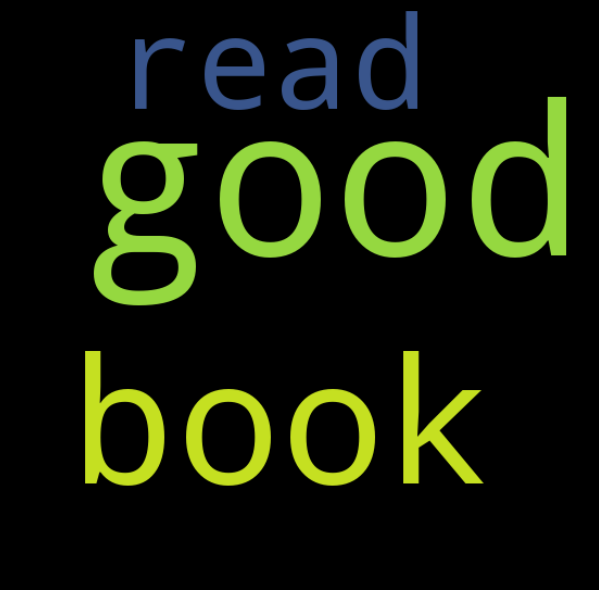

In [17]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

documents = (
"This book is good.",
"Good books are good to read."
)


all_words = ''.join(list(documents))


spam_wordclod = WordCloud(width = 512,height = 512).generate(all_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### If you have read this notebook upto this point, then you are ready to perform text classification using naive Bayes classifiers.